In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

Saving nasigoreng.jpg to nasigoreng (2).jpg
1/1 [==============================] - 1s 951ms/step


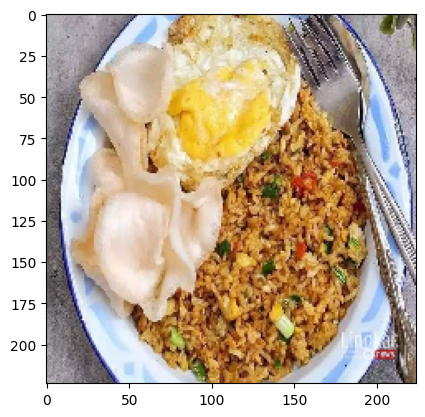

AP115: 99.51%


In [6]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = tf.keras.models.load_model('/content/model_v1.h5') #input model

labels = ['AP115', 'AP116', 'AP117', 'AP118', 'AP119',
        'AP120', 'BP077', 'CP062', 'CP083', 'DP030',
        'DP031', 'EP016', 'FP036', 'FP062', 'FP089',
        'FP090', 'FP091', 'FP092', 'FP093', 'GP083']

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  
  zipped = zip(labels, proba * 100)
  zipped = list(zipped)
  
  for label, percentage in zipped:
    if percentage > 50: #munculin prediksi yang >50%
      print(f"{label}: {percentage:.2f}%")